In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

Orginal Dataset from Kaggle -> https://www.kaggle.com/datasets/prathamtripathi/drug-classification


In [ ]:
data = pd.read_csv('https://raw.githubusercontent.com/Gwen00369/CIS_9660/main/drug200.csv')

In [ ]:
data.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


In [ ]:
data.shape

(200, 6)

In [ ]:
data.describe()

,Age,Na_to_K
count,200.000000,200.000000
mean,44.315000,16.084485
std,16.544315,7.223956
min,15.000000,6.269000
25%,31.000000,10.445500
50%,45.000000,13.936500
75%,58.000000,19.380000
max,74.000000,38.247000


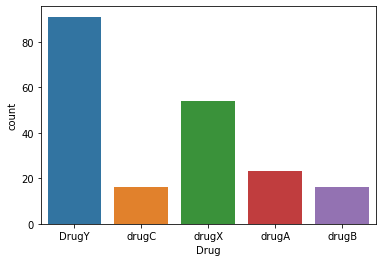

In [ ]:
sns.countplot(x='Drug', data = data)

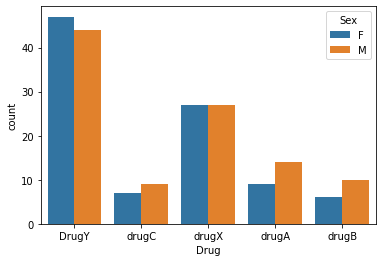

In [ ]:
sns.countplot(x='Drug',data = data, hue = 'Sex')

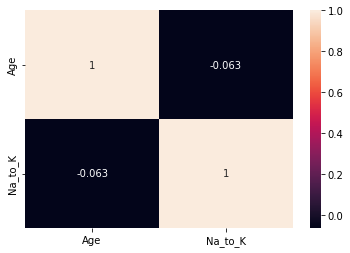

In [ ]:
sns.heatmap(data.corr(), annot=True)

In [ ]:
data.isna().sum()

Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
dtype: int64

In [ ]:
#Using one hot coding to convert categorical data

pd.get_dummies(data['Sex'], drop_first = True)

,M
0,0
1,1
2,1
3,0
4,0
...,...
195,0
196,1
197,1
198,1


In [ ]:
data['Sex'] = pd.get_dummies(data['Sex'], drop_first = True)

In [ ]:
BP_encoded = pd.get_dummies(data['BP'])
BP_encoded

,HIGH,LOW,NORMAL
0,1,0,0
1,0,1,0
2,0,1,0
3,0,0,1
4,0,1,0
...,...,...,...
195,0,1,0
196,0,1,0
197,0,0,1
198,0,0,1


In [ ]:
data = pd.concat([data, BP_encoded], axis=1)

In [ ]:
data = data.drop(['BP'], axis = 1)

In [ ]:
pd.get_dummies(data['Cholesterol'])

,HIGH,NORMAL
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0
...,...,...
195,1,0
196,1,0
197,1,0
198,0,1


In [ ]:
data['Cholesterol'] = pd.get_dummies(data['Cholesterol'], drop_first = True)

In [ ]:
data

,Age,Sex,Cholesterol,Na_to_K,Drug,HIGH,LOW,NORMAL
0,23,0,0,25.355,DrugY,1,0,0
1,47,1,0,13.093,drugC,0,1,0
2,47,1,0,10.114,drugC,0,1,0
3,28,0,0,7.798,drugX,0,0,1
4,61,0,0,18.043,DrugY,0,1,0
...,...,...,...,...,...,...,...,...
195,56,0,0,11.567,drugC,0,1,0
196,16,1,0,12.006,drugC,0,1,0
197,52,1,0,9.894,drugX,0,0,1
198,23,1,1,14.020,drugX,0,0,1


In [ ]:
#Define the features

X = data[['Age','Sex', 'Cholesterol','Na_to_K','HIGH','LOW','NORMAL']]

In [ ]:
X

,Age,Sex,Cholesterol,Na_to_K,HIGH,LOW,NORMAL
0,23,0,0,25.355,1,0,0
1,47,1,0,13.093,0,1,0
2,47,1,0,10.114,0,1,0
3,28,0,0,7.798,0,0,1
4,61,0,0,18.043,0,1,0
...,...,...,...,...,...,...,...
195,56,0,0,11.567,0,1,0
196,16,1,0,12.006,0,1,0
197,52,1,0,9.894,0,0,1
198,23,1,1,14.020,0,0,1


In [ ]:
# Define the label

y = data[['Drug']]

In [ ]:
y

,Drug
0,DrugY
1,drugC
2,drugC
3,drugX
4,DrugY
...,...
195,drugC
196,drugC
197,drugX
198,drugX


In [ ]:
#Spearating the dataset

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 10)

In [ ]:
#Feature Scaling (normalize the range)

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
#Training or fitting data to model

from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

DecisionTreeClassifier()

In [ ]:
#getting the parameter of decision tree

dt.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

In [ ]:
from sklearn.model_selection import KFold 
from sklearn.model_selection import cross_val_score

In [ ]:
# 5 Fold cross validation for Logistic Regression
k = 5
kf = KFold(n_splits=k)
result = cross_val_score(dt, X_train, y_train, cv = kf, scoring='accuracy')
 
print(f' Avg accuracy:{result.mean()}')

 Avg accuracy:0.9928571428571429


In [ ]:
y_pred_dt = dt.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_dt))

              precision    recall  f1-score   support

       DrugY       1.00      1.00      1.00        25
       drugA       0.78      1.00      0.88         7
       drugB       1.00      0.67      0.80         6
       drugC       1.00      1.00      1.00         7
       drugX       1.00      1.00      1.00        15

    accuracy                           0.97        60
   macro avg       0.96      0.93      0.93        60
weighted avg       0.97      0.97      0.97        60



**Random Forest**

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=10, criterion='gini',random_state=1)
rf.fit(X_train,y_train.values.ravel())

RandomForestClassifier(n_estimators=10, random_state=1)

In [ ]:
result = cross_val_score(rf, X_train, y_train.values.ravel(), cv = kf, scoring='accuracy')
 
print(f' Avg accuracy:{result.mean()}')

 Avg accuracy:0.9857142857142858


In [ ]:
y_pred_rf = rf.predict(X_test)

In [ ]:
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

       DrugY       1.00      1.00      1.00        25
       drugA       0.70      1.00      0.82         7
       drugB       1.00      0.50      0.67         6
       drugC       1.00      1.00      1.00         7
       drugX       1.00      1.00      1.00        15

    accuracy                           0.95        60
   macro avg       0.94      0.90      0.90        60
weighted avg       0.96      0.95      0.95        60

